In [ ]:
!pip install yfinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import seaborn as sns

In [ ]:
data = yf.download("^NSEI",period="10y",interval="1d")

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.sort_values(by='Date',inplace=True)

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-04-01,5835.000000,5860.200195,5810.399902,5826.049805,5826.049805,0
2011-04-04,5842.000000,5918.700195,5833.200195,5908.450195,5908.450195,0
2011-04-05,5923.850098,5928.649902,5855.850098,5910.049805,5910.049805,0
2011-04-06,5908.000000,5944.450195,5868.799805,5891.750000,5891.750000,0
2011-04-07,5888.549805,5906.100098,5866.250000,5885.700195,5885.700195,0


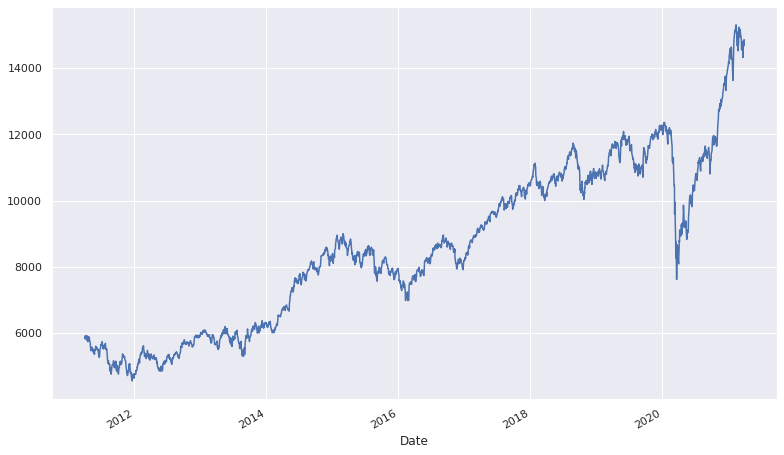

In [ ]:
sns.set(rc={'figure.figsize':(13,8)})
data['Adj Close'].plot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


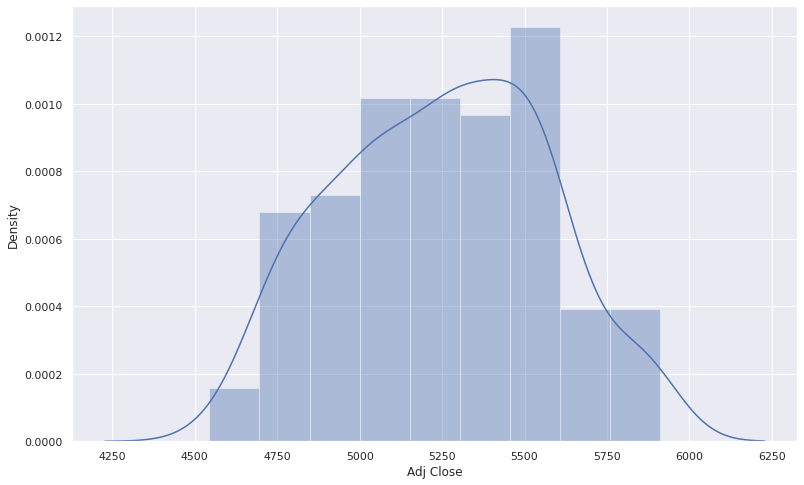

In [ ]:
sns.distplot(data['Adj Close'].head(252))

In [ ]:
data['return_per'] = ((data['Adj Close'] - data['Adj Close'].shift(1)) / data['Adj Close']) * 100
data.dropna(inplace=True)

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume,return_per
Date,,,,,,,
2011-04-04,5842.000000,5918.700195,5833.200195,5908.450195,5908.450195,0,1.394619
2011-04-05,5923.850098,5928.649902,5855.850098,5910.049805,5910.049805,0,0.027066
2011-04-06,5908.000000,5944.450195,5868.799805,5891.750000,5891.750000,0,-0.310600
2011-04-07,5888.549805,5906.100098,5866.250000,5885.700195,5885.700195,0,-0.102788
2011-04-08,5886.750000,5926.950195,5822.000000,5842.000000,5842.000000,0,-0.748035
...,...,...,...,...,...,...,...
2021-03-25,14570.900391,14575.599609,14264.400391,14324.900391,14324.900391,606800,-1.567201
2021-03-26,14506.299805,14572.900391,14414.250000,14507.299805,14507.299805,481000,1.257294
2021-03-30,14628.500000,14876.299805,14617.599609,14845.099609,14845.099609,594500,2.275497


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


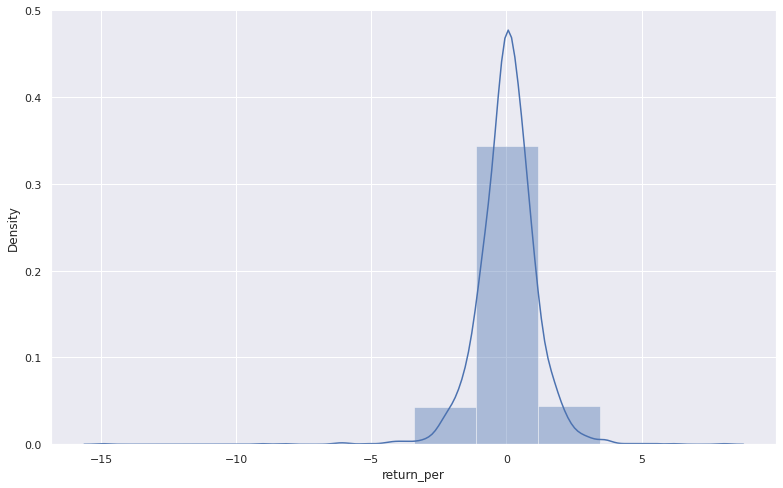

In [ ]:
sns.set(rc={'figure.figsize':(13,8)})
sns.distplot(data['return_per'],bins=10)

In [ ]:
data['return_per'].std()

1.1255630656680902

In [ ]:
# Last 1 year volatility
data['return_per'].tail(252).std()

1.4717470400623918

# The 68-95-99.7 Rule

![](https://miro.medium.com/max/24000/1*IdGgdrY_n_9_YfkaCh-dag.png)

| Index      | Time Interval | 1 Std Dev(68%) | 2 Std Dev(95%) | 3 Std Dev(99.7%) |
|------------|---------------|----------------|----------------|------------------|
| Nifty      | Daily         | 1.12%          | 2.24%          | 3.36%            |
| Nifty      | Weekly        | 2.36%          | 4.72%          | 7.08%            |
| Nifty      | Monthly       | 5.26%          | 10.52%         | 15.78%           |
| Bank Nifty | Daily         | 1.72%          | 3.44%          | 5.16%            |
| Bank Nifty | Weekly        | 3.84%          | 7.68%          | 11.52%           |
| Bank Nifty | Monthly       | 9.59%          | 19.18%         | 28.77%           |